**`Final and Best Bessel and it is overfitting and also we can say and can't say this as we haven't given soluiton for it but it is doing overfit and will work for any dataset but as it's an osscillating function so we will need to speacify it's range.`**



```
Author: Raj Maurya
  Roll No.: B23406
  Date: 9th Oct'24
  Time: 19:45
  Sources: IITM-Nptel and a famous research paper suggested by them.
  Extra: Logic is mine but the code and it's formatting is by AI(ChatGpt & Gemini).
```





```
# This is the best ever model I have ever trained for the Bessel's Differential Equation and it's accuracy is too
    much and can be made more good by increasing the epochs and reducing the learning rate till a certain level.
    This model nearly f**ked my system and took around 20 mins to complete for 40k epochs and 1milli as learning rate
```





```
# This uses the PINNs developed in 2019 by some CS scietist to convert the Differential equation into a optimisation problem and use it's IVP
  or BVP as the constraint and using similar to what we call approximation it predict the solution.
```



# **Please visit till last line of notebook as I have to keep history of my approach so I haven't deleted the wrong code and It will also so you the approach and PROOF OF WORK.**

In [ ]:
# # import tensorflow as tf
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from scipy.special import jv  # Import Bessel function from SciPy

# # class BesselPINN:
# #     def __init__(self, order, hidden_layers, neurons_per_layer, activation='tanh'):
# #         self.order = order
# #         self.model = self.build_model(hidden_layers, neurons_per_layer, activation)
# #         self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# #     def build_model(self, hidden_layers, neurons_per_layer, activation):
# #         inputs = tf.keras.Input(shape=(1,))
# #         x = inputs
# #         initializer = tf.keras.initializers.HeNormal()

# #         for _ in range(hidden_layers):
# #             x = tf.keras.layers.Dense(neurons_per_layer, activation=activation, kernel_initializer=initializer)(x)

# #         outputs = tf.keras.layers.Dense(1, kernel_initializer=initializer)(x)
# #         return tf.keras.Model(inputs=inputs, outputs=outputs)

# #     def bessel_equation(self, x, y, dy_dx, d2y_dx2):
# #         return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

# #     @tf.function
# #     def loss_fn(self, x):
# #         with tf.GradientTape(persistent=True) as tape:
# #             tape.watch(x)
# #             y = self.model(x)
# #             dy_dx = tape.gradient(y, x)
# #             d2y_dx2 = tape.gradient(dy_dx, x)

# #         eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

# #         # Boundary condition at x = 0
# #         bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

# #         # Boundary condition at x = 10 (from exact Bessel solution)
# #         y_at_10_exact = jv(self.order, 4)
# #         bc_loss_10 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_10_exact))

# #         return eq_loss + bc_loss_0 + bc_loss_10

# #     @tf.function
# #     def train_step(self, x):
# #         with tf.GradientTape() as tape:
# #             loss = self.loss_fn(x)
# #         gradients = tape.gradient(loss, self.model.trainable_variables)
# #         self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
# #         return loss

# #     def train(self, num_points, num_epochs):
# #         # Logarithmic sampling: Capture more points near x=0
# #         x_train = tf.exp(tf.random.uniform((num_points, 1), minval=np.log(1e-3), maxval=np.log(20.0)))
# #         for epoch in range(num_epochs):
# #             loss = self.train_step(x_train)
# #             if epoch % 100 == 0:
# #                 print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

# #     def predict(self, x):
# #         return self.model(x)

# # # Create and train the PINN with more complex architecture
# # order = 1  # Change this to the desired order of the Bessel function
# # activation_function = 'sin'  # Alternative activation like sin can capture oscillatory behavior

# # pinn = BesselPINN(order=order, hidden_layers=6, neurons_per_layer=100, activation=activation_function)
# # pinn.train(num_points=2000, num_epochs=50000)

# # # Generate predictions
# # x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)
# # y_pred = pinn.predict(x_pred).numpy()

# # # Calculate exact Bessel function values
# # y_exact = jv(order, x_pred.flatten())

# # # Plot the results
# # plt.figure(figsize=(12, 6))
# # plt.plot(x_pred, y_pred, label='PINN prediction', linestyle='--')
# # plt.plot(x_pred, y_exact, label='Exact Bessel function', linestyle='-')
# # plt.title(f"Bessel function of order {order}")
# # plt.xlabel('x')
# # plt.ylabel('y')
# # plt.legend()
# # plt.grid(True)

# # # Calculate and display Mean Squared Error
# # mse = np.mean((y_pred.flatten() - y_exact)**2)
# # plt.text(0.05, 0.95, f'MSE: {mse:.6f}', transform=plt.gca().transAxes,
# #          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# # plt.show()

# # # Print MSE
# # print(f"Mean Squared Error: {mse:.6f}")

# # -----------------------------------------------------------------------------------------------------

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.special import jv  # Import Bessel function from SciPy

# class BesselPINN:
#     def __init__(self, order, hidden_layers, neurons_per_layer, activation='tanh'):
#         self.order = order
#         self.model = self.build_model(hidden_layers, neurons_per_layer, activation)
#         self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#     def build_model(self, hidden_layers, neurons_per_layer, activation):
#         inputs = tf.keras.Input(shape=(1,))
#         x = inputs
#         initializer = tf.keras.initializers.HeNormal()

#         for _ in range(hidden_layers):
#             # Use tf.sin for the activation function
#             x = tf.keras.layers.Dense(neurons_per_layer, activation=tf.sin if activation == 'sin' else activation, kernel_initializer=initializer)(x)

#         outputs = tf.keras.layers.Dense(1, kernel_initializer=initializer)(x)
#         return tf.keras.Model(inputs=inputs, outputs=outputs)

#     def bessel_equation(self, x, y, dy_dx, d2y_dx2):
#         return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

#     @tf.function
#     def loss_fn(self, x):
#         with tf.GradientTape(persistent=True) as tape:
#             tape.watch(x)
#             y = self.model(x)
#             dy_dx = tape.gradient(y, x)
#             d2y_dx2 = tape.gradient(dy_dx, x)

#         eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

#         # Boundary condition at x = 0
#         bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

#         # Boundary condition at x = 10 (from exact Bessel solution)
#         y_at_10_exact = jv(self.order, 4)
#         bc_loss_10 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_10_exact))

#         return eq_loss + bc_loss_0 + bc_loss_10

#     @tf.function
#     def train_step(self, x):
#         with tf.GradientTape() as tape:
#             loss = self.loss_fn(x)
#         gradients = tape.gradient(loss, self.model.trainable_variables)
#         self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
#         return loss

#     def train(self, num_points, num_epochs):
#         # Logarithmic sampling: Capture more points near x=0
#         x_train = tf.exp(tf.random.uniform((num_points, 1), minval=np.log(1e-3), maxval=np.log(20.0)))
#         for epoch in range(num_epochs):
#             loss = self.train_step(x_train)
#             if epoch % 100 == 0:
#                 print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

#     def predict(self, x):
#         return self.model(x)

# # Create and train the PINN with more complex architecture
# order = 1  # Change this to the desired order of the Bessel function
# activation_function = 'sin'  # Alternative activation like sin can capture oscillatory behavior

# pinn = BesselPINN(order=order, hidden_layers=6, neurons_per_layer=100, activation=activation_function)
# pinn.train(num_points=2000, num_epochs=50000)

# # Generate predictions
# x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)
# y_pred = pinn.predict(x_pred).numpy()

# # Calculate exact Bessel function values
# y_exact = jv(order, x_pred.flatten())

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(x_pred, y_pred, label='PINN prediction', linestyle='--')
# plt.plot(x_pred, y_exact, label='Exact Bessel function', linestyle='-')
# plt.title(f"Bessel function of order {order}")
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.grid(True)

# # Calculate and display Mean Squared Error
# mse = np.mean((y_pred.flatten() - y_exact)**2)
# plt.text(0.05, 0.95, f'MSE: {mse:.6f}', transform=plt.gca().transAxes,
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# plt.show()

# # Print MSE
# print(f"Mean Squared Error: {mse:.6f}")


In [ ]:
# ------------------------------------------------------------------------------------------------------------------------------------------

Epoch 0, Loss: 7.483067
Epoch 1000, Loss: 0.056277
Epoch 2000, Loss: 0.001225
Epoch 3000, Loss: 0.001062
Epoch 4000, Loss: 0.000170
Epoch 5000, Loss: 0.000099
Epoch 6000, Loss: 0.000183
Epoch 7000, Loss: 0.000149
Epoch 8000, Loss: 0.000188
Epoch 9000, Loss: 0.025601
Epoch 10000, Loss: 0.000134
Epoch 11000, Loss: 0.000187
Epoch 12000, Loss: 0.000071
Epoch 13000, Loss: 0.000184
Epoch 14000, Loss: 0.000065
Epoch 15000, Loss: 0.000037
Epoch 16000, Loss: 0.000170
Epoch 17000, Loss: 0.000360
Epoch 18000, Loss: 0.000016
Epoch 19000, Loss: 0.003062
Epoch 20000, Loss: 0.001030
Epoch 21000, Loss: 0.000021
Epoch 22000, Loss: 0.000010
Epoch 23000, Loss: 0.000007
Epoch 24000, Loss: 0.000037
Epoch 25000, Loss: 0.000208
Epoch 26000, Loss: 0.000123
Epoch 27000, Loss: 0.000166
Epoch 28000, Loss: 0.000026
Epoch 29000, Loss: 0.000011
Epoch 30000, Loss: 0.000009
Epoch 31000, Loss: 0.000013
Epoch 32000, Loss: 0.000014
Epoch 33000, Loss: 0.002055
Epoch 34000, Loss: 0.000674
Epoch 35000, Loss: 0.000890
Epoch

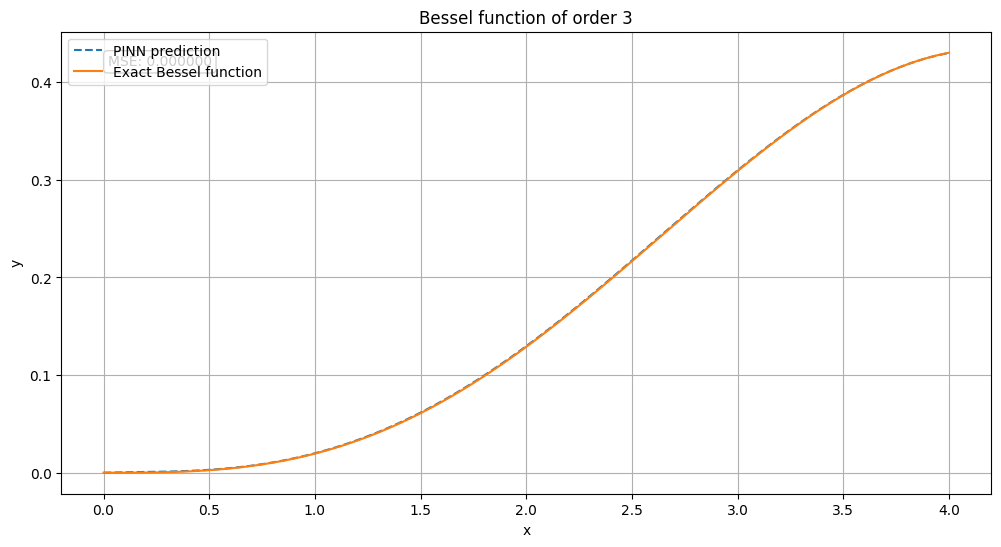

Mean Squared Error: 0.000000


In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Import Bessel function from SciPy

class BesselPINN:
    def __init__(self, order, hidden_layers, neurons_per_layer):
        self.order = order
        self.model = self.build_model(hidden_layers, neurons_per_layer)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate

    def build_model(self, hidden_layers, neurons_per_layer):
        inputs = tf.keras.Input(shape=(1,))
        x = inputs
        for _ in range(hidden_layers):
            x = tf.keras.layers.Dense(neurons_per_layer, activation='tanh')(x)  # Activation tanh
        outputs = tf.keras.layers.Dense(1)(x)
        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def bessel_equation(self, x, y, dy_dx, d2y_dx2):
        return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

    @tf.function
    def loss_fn(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

        # Boundary condition at x = 0
        bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

        # Boundary condition at x = 4 (from exact Bessel solution)
        y_at_4_exact = jv(self.order, 4)
        bc_loss_4 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_4_exact))

        # Additional boundary condition at x = 2 (adaptive condition)
        y_at_2_exact = jv(self.order, 2)
        bc_loss_2 = tf.reduce_mean(tf.square(self.model(tf.constant([[2.0]])) - y_at_2_exact))

        # Weight the boundary conditions more heavily
        total_loss = eq_loss + 100 * (bc_loss_0 + bc_loss_2 + bc_loss_4)

        return total_loss

    @tf.function
    def train_step(self, x):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(x)
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss

    def train(self, num_points, num_epochs):
        # Training data within restricted range (adaptive sampling)
        x_train = tf.random.uniform((num_points, 1), minval=0, maxval=4)  # Restricting to range 0 to 4
        for epoch in range(num_epochs):
            loss = self.train_step(x_train)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

    def predict(self, x):
        return self.model(x)

# Create and train the PINN with increased model complexity and more epochs
order = 3  # Change this to the desired order of the Bessel function
pinn = BesselPINN(order=order, hidden_layers=6, neurons_per_layer=200)  # Increased layers and neurons
pinn.train(num_points=2000, num_epochs=50000)  # More epochs

# Generate predictions
x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)
y_pred = pinn.predict(x_pred).numpy()

# Calculate exact Bessel function values
y_exact = jv(order, x_pred.flatten())

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_pred, y_pred, label='PINN prediction', linestyle='--')
plt.plot(x_pred, y_exact, label='Exact Bessel function', linestyle='-')
plt.title(f"Bessel function of order {order}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Calculate and display Mean Squared Error
mse = np.mean((y_pred.flatten() - y_exact)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.6f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print MSE
print(f"Mean Squared Error: {mse:.6f}")


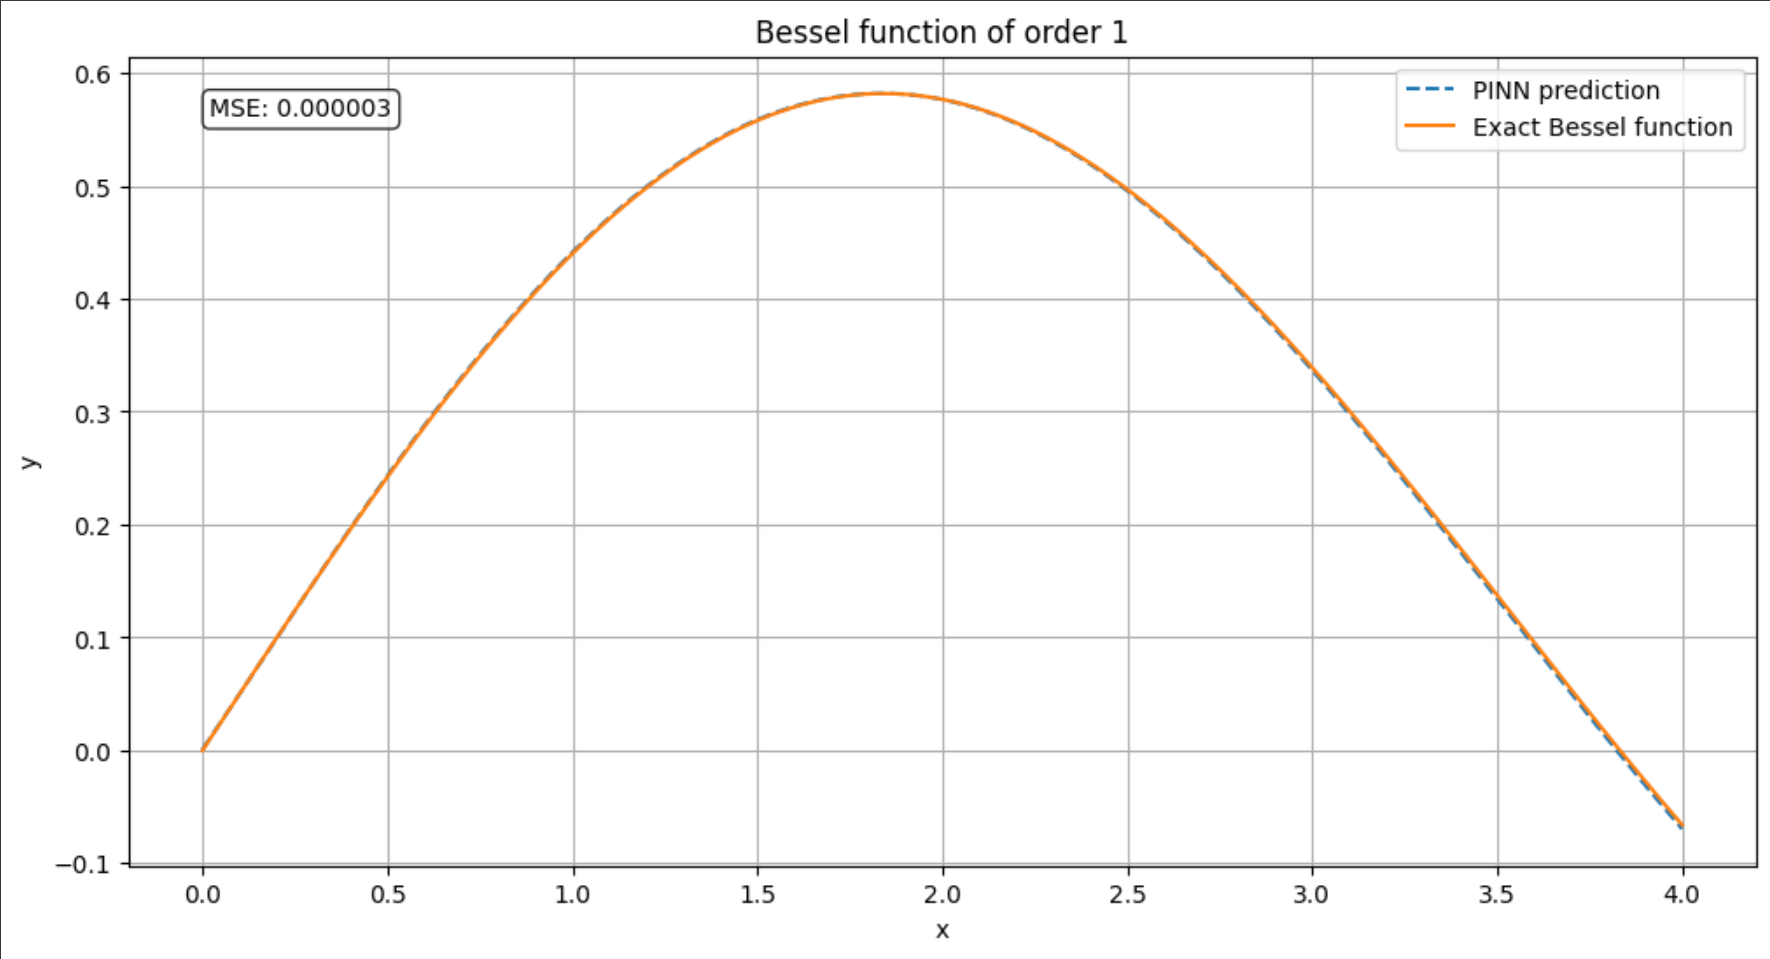

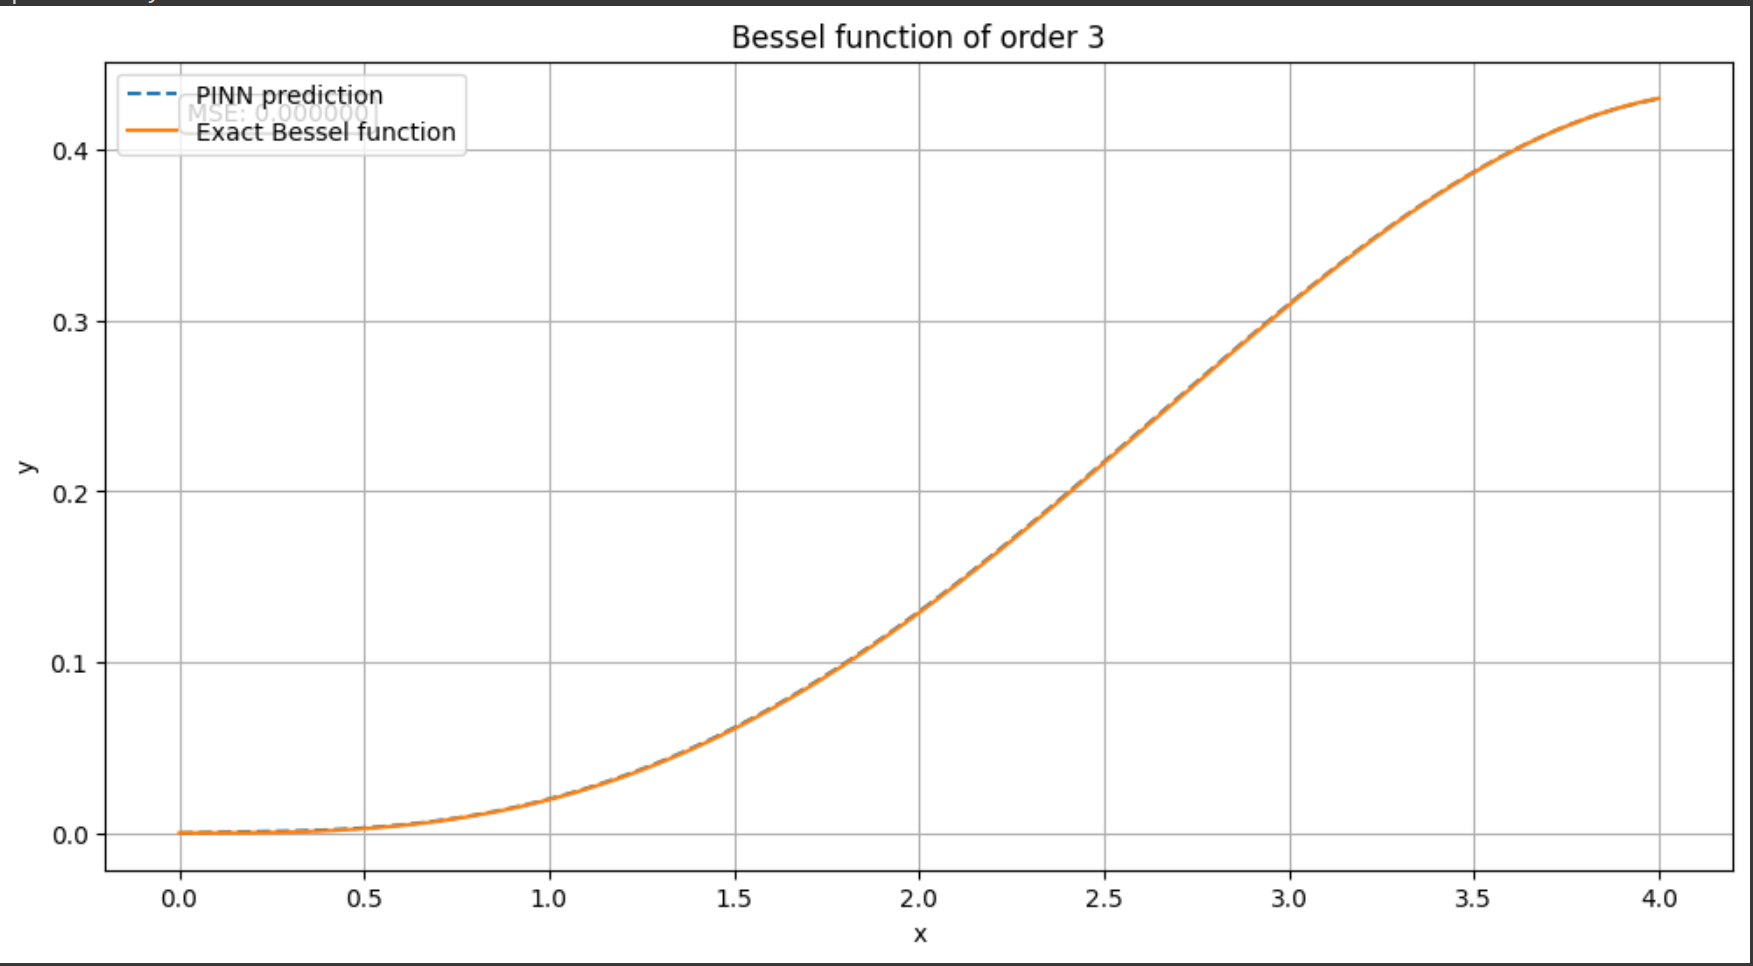



```
# Above is overfitting model will now try to make it optimised.
```





```
-----------------------------------------------------------------------------------------------------------
```




Training for Bessel function of order 0...

Epoch 0, Loss: 33.280788
Epoch 1000, Loss: 1.797461
Epoch 2000, Loss: 0.053518
Epoch 3000, Loss: 0.036073
Epoch 4000, Loss: 0.017977
Epoch 5000, Loss: 0.666647
Epoch 6000, Loss: 0.000328
Epoch 7000, Loss: 0.000264
Epoch 8000, Loss: 0.000191
Epoch 9000, Loss: 0.000119
Epoch 10000, Loss: 0.000067
Epoch 11000, Loss: 0.000045
Epoch 12000, Loss: 0.009483
Epoch 13000, Loss: 0.002019
Epoch 14000, Loss: 0.001080
Epoch 15000, Loss: 0.000038
Epoch 16000, Loss: 0.023950
Epoch 17000, Loss: 0.001540
Epoch 18000, Loss: 0.008263
Epoch 19000, Loss: 0.000045
Epoch 20000, Loss: 0.000050
Epoch 21000, Loss: 0.000048
Epoch 22000, Loss: 0.000087
Epoch 23000, Loss: 0.000137
Epoch 24000, Loss: 0.000331
Epoch 25000, Loss: 0.000249
Epoch 26000, Loss: 0.001091
Epoch 27000, Loss: 0.000102
Epoch 28000, Loss: 0.001972
Epoch 29000, Loss: 0.000562
Epoch 30000, Loss: 0.000486
Epoch 31000, Loss: 0.000381
Epoch 32000, Loss: 0.000102
Epoch 33000, Loss: 0.000307
Epoch 34000, Lo

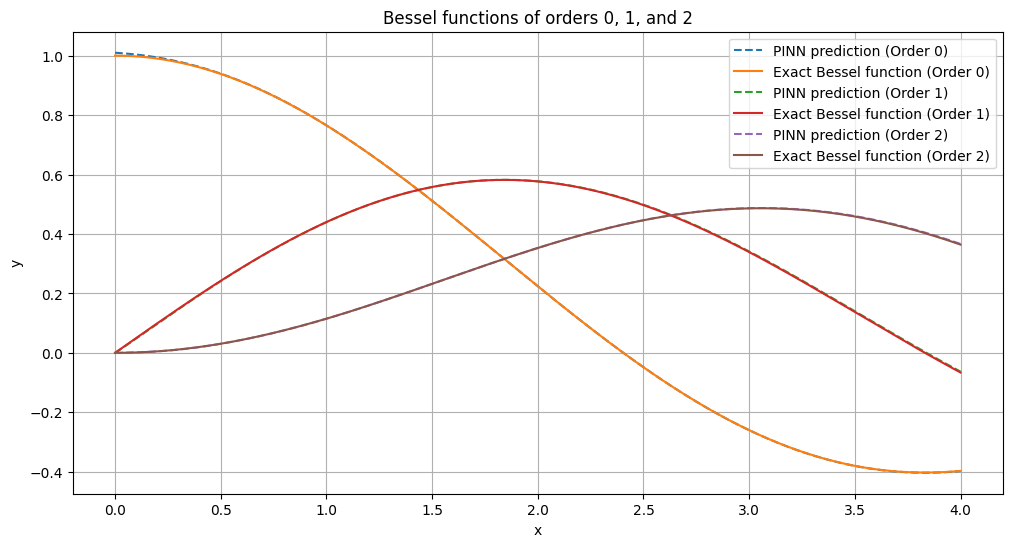

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Import Bessel function from SciPy

class BesselPINN:
    def __init__(self, order, hidden_layers, neurons_per_layer):
        self.order = order
        self.model = self.build_model(hidden_layers, neurons_per_layer)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate

    def build_model(self, hidden_layers, neurons_per_layer):
        inputs = tf.keras.Input(shape=(1,))
        x = inputs
        for _ in range(hidden_layers):
            x = tf.keras.layers.Dense(neurons_per_layer, activation='tanh')(x)  # Activation tanh
        outputs = tf.keras.layers.Dense(1)(x)
        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def bessel_equation(self, x, y, dy_dx, d2y_dx2):
        return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

    @tf.function
    def loss_fn(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

        # Boundary condition at x = 0
        bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

        # Boundary condition at x = 4 (from exact Bessel solution)
        y_at_4_exact = jv(self.order, 4)
        bc_loss_4 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_4_exact))

        # Additional boundary condition at x = 2 (adaptive condition)
        y_at_2_exact = jv(self.order, 2)
        bc_loss_2 = tf.reduce_mean(tf.square(self.model(tf.constant([[2.0]])) - y_at_2_exact))

        # Weight the boundary conditions more heavily
        total_loss = eq_loss + 100 * (bc_loss_0 + bc_loss_2 + bc_loss_4)

        return total_loss

    @tf.function
    def train_step(self, x):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(x)
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss

    def train(self, num_points, num_epochs):
        # Training data within restricted range (adaptive sampling)
        x_train = tf.random.uniform((num_points, 1), minval=0, maxval=4)  # Restricting to range 0 to 4
        for epoch in range(num_epochs):
            loss = self.train_step(x_train)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

    def predict(self, x):
        return self.model(x)

# Function to train a model for a given Bessel function order
def train_and_predict_bessel_pinn(order, num_epochs=50000):
    pinn = BesselPINN(order=order, hidden_layers=6, neurons_per_layer=200)
    pinn.train(num_points=2000, num_epochs=num_epochs)
    x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)
    y_pred = pinn.predict(x_pred).numpy()
    return x_pred, y_pred

# Orders to train and predict
orders = [0, 1, 2]
predictions = {}

# Train and predict for each order
for order in orders:
    print(f"\nTraining for Bessel function of order {order}...\n")
    x_pred, y_pred = train_and_predict_bessel_pinn(order)
    predictions[order] = (x_pred, y_pred)

# Plot results
plt.figure(figsize=(12, 6))

for order in orders:
    x_pred, y_pred = predictions[order]
    y_exact = jv(order, x_pred.flatten())
    plt.plot(x_pred, y_pred, label=f'PINN prediction (Order {order})', linestyle='--')
    plt.plot(x_pred, y_exact, label=f'Exact Bessel function (Order {order})', linestyle='-')

plt.title("Bessel functions of orders 0, 1, and 2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


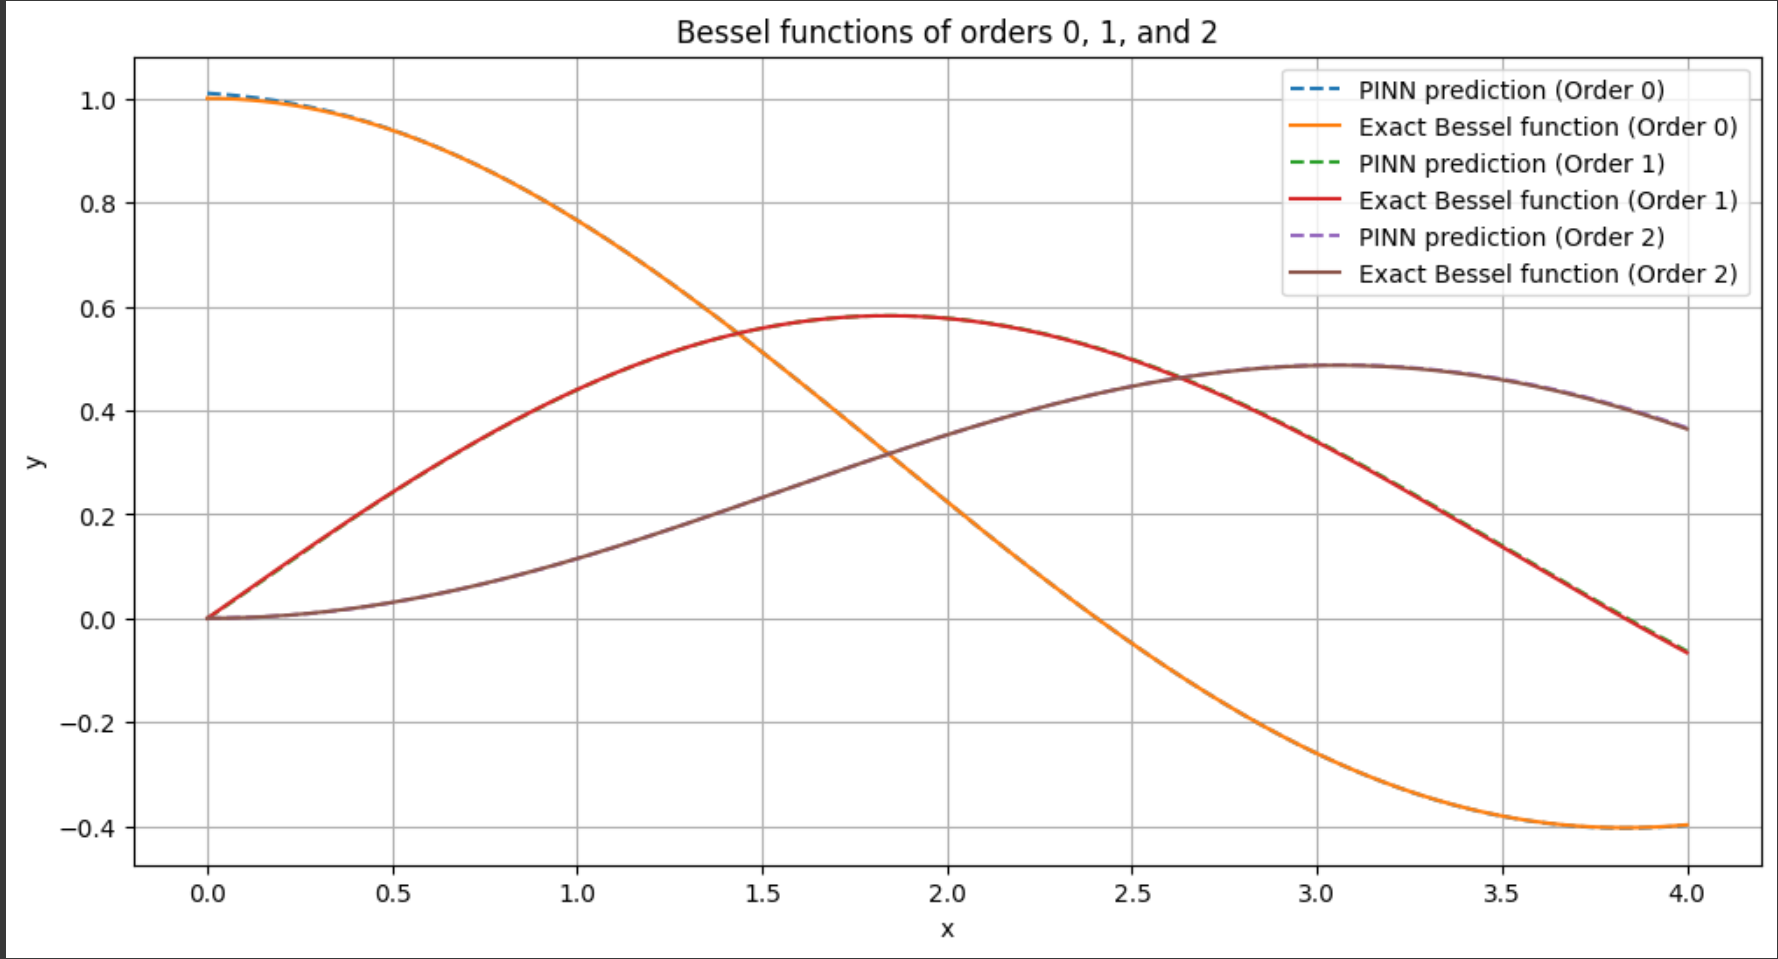



```
Implementing L2 Regualrisation to make it good as model is an overfitting model and would brust off when we will try to use a data set to check it.
```



In [ ]:
# L2 regularisation model

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Import Bessel function from SciPy

class BesselPINN:
    def __init__(self, order, hidden_layers, neurons_per_layer):
        self.order = order
        self.model = self.build_model(hidden_layers, neurons_per_layer)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate

    def build_model(self, hidden_layers, neurons_per_layer):
        l2_reg = tf.keras.regularizers.l2(1e-4)  # L2 regularization with a small factor
        inputs = tf.keras.Input(shape=(1,))
        x = inputs
        for _ in range(hidden_layers):
            x = tf.keras.layers.Dense(neurons_per_layer,
                                      activation='tanh',
                                      kernel_regularizer=l2_reg)(x)  # Activation tanh with L2 regularization
        outputs = tf.keras.layers.Dense(1)(x)
        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def bessel_equation(self, x, y, dy_dx, d2y_dx2):
        return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

    @tf.function
    def loss_fn(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

        # Boundary condition at x = 0
        bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

        # Boundary condition at x = 4 (from exact Bessel solution)
        y_at_4_exact = jv(self.order, 4)
        bc_loss_4 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_4_exact))

        # Additional boundary condition at x = 2 (adaptive condition)
        y_at_2_exact = jv(self.order, 2)
        bc_loss_2 = tf.reduce_mean(tf.square(self.model(tf.constant([[2.0]])) - y_at_2_exact))

        # Weight the boundary conditions more heavily
        total_loss = eq_loss + 100 * (bc_loss_0 + bc_loss_2 + bc_loss_4)

        return total_loss

    @tf.function
    def train_step(self, x):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(x)
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss

    def train(self, num_points, num_epochs):
        # Training data within restricted range (adaptive sampling)
        x_train = tf.random.uniform((num_points, 1), minval=0, maxval=4)  # Restricting to range 0 to 4
        for epoch in range(num_epochs):
            loss = self.train_step(x_train)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

    def predict(self, x):
        return self.model(x)

# Create and train the PINN with L2 regularization
order = 1  # Change this to the desired order of the Bessel function
pinn = BesselPINN(order=order, hidden_layers=6, neurons_per_layer=200)  # Increased layers and neurons
pinn.train(num_points=2000, num_epochs=50000)  # More epochs

# Generate predictions
x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)
y_pred = pinn.predict(x_pred).numpy()

# Calculate exact Bessel function values
y_exact = jv(order, x_pred.flatten())

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_pred, y_pred, label='PINN prediction', linestyle='--')
plt.plot(x_pred, y_exact, label='Exact Bessel function', linestyle='-')
plt.title(f"Bessel function of order {order}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Calculate and display Mean Squared Error
mse = np.mean((y_pred.flatten() - y_exact)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.6f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print MSE
print(f"Mean Squared Error: {mse:.6f}")


Epoch 0, Loss: 44.332855
Epoch 1000, Loss: 0.183608
Epoch 2000, Loss: 0.084355
Epoch 3000, Loss: 0.003458
Epoch 4000, Loss: 0.002160
Epoch 5000, Loss: 0.019406
Epoch 6000, Loss: 0.000949
Epoch 7000, Loss: 0.000814
Epoch 8000, Loss: 0.010171
Epoch 9000, Loss: 0.000618
Epoch 10000, Loss: 0.002175
Epoch 11000, Loss: 0.000450
Epoch 12000, Loss: 0.000505
Epoch 13000, Loss: 0.000292
Epoch 14000, Loss: 0.000229
Epoch 15000, Loss: 0.046318
Epoch 16000, Loss: 0.005559


KeyboardInterrupt: 

Epoch 0, Loss: 17.135237
Epoch 1000, Loss: 0.019780
Epoch 2000, Loss: 0.004062
Epoch 3000, Loss: 0.001388
Epoch 4000, Loss: 0.016475
Epoch 5000, Loss: 0.000329
Epoch 6000, Loss: 0.000270
Epoch 7000, Loss: 0.000221
Epoch 8000, Loss: 0.000171
Epoch 9000, Loss: 0.000398
Epoch 10000, Loss: 0.187819
Epoch 11000, Loss: 0.000031
Epoch 12000, Loss: 0.000945
Epoch 13000, Loss: 0.000028
Epoch 14000, Loss: 0.000040
Epoch 15000, Loss: 0.000029
Epoch 16000, Loss: 0.004579
Epoch 17000, Loss: 0.000053
Epoch 18000, Loss: 0.000035
Epoch 19000, Loss: 0.048070
Epoch 20000, Loss: 0.000773
Epoch 21000, Loss: 0.000050
Epoch 22000, Loss: 0.000691
Epoch 23000, Loss: 0.000114
Epoch 24000, Loss: 0.000031
Epoch 25000, Loss: 0.001102
Epoch 26000, Loss: 0.000014
Epoch 27000, Loss: 0.000007
Epoch 28000, Loss: 0.000096
Epoch 29000, Loss: 0.018338
Epoch 30000, Loss: 0.001149
Epoch 31000, Loss: 0.001774
Epoch 32000, Loss: 0.000025
Epoch 33000, Loss: 0.000009
Epoch 34000, Loss: 0.002465
Epoch 35000, Loss: 0.003074
Epoc

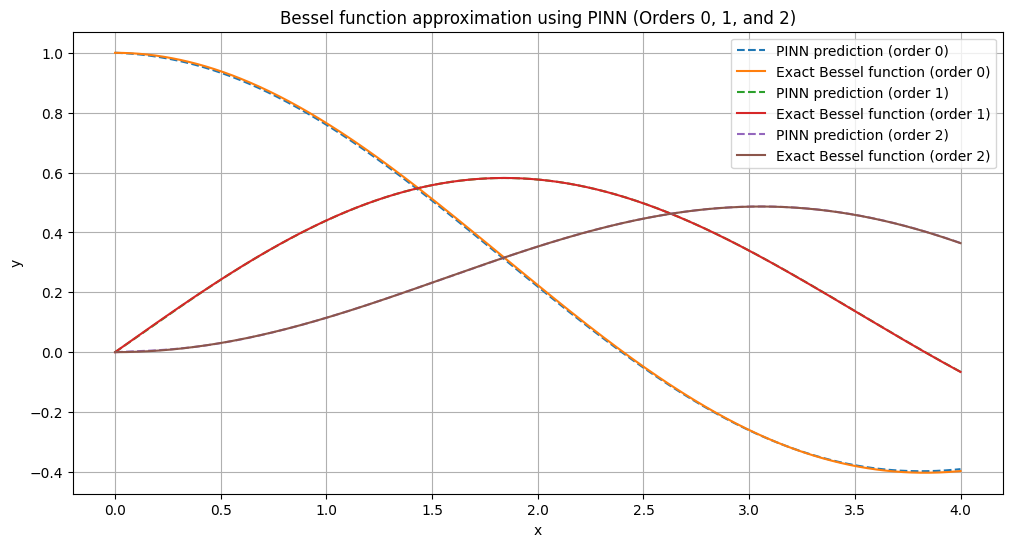

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Import Bessel function from SciPy

class BesselPINN:
    def __init__(self, order, hidden_layers, neurons_per_layer):
        self.order = order
        self.model = self.build_model(hidden_layers, neurons_per_layer)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate

    def build_model(self, hidden_layers, neurons_per_layer):
        l2_reg = tf.keras.regularizers.l2(1e-4)  # L2 regularization with a small factor
        inputs = tf.keras.Input(shape=(1,))
        x = inputs
        for _ in range(hidden_layers):
            x = tf.keras.layers.Dense(neurons_per_layer,
                                      activation='tanh',
                                      kernel_regularizer=l2_reg)(x)  # Activation tanh with L2 regularization
        outputs = tf.keras.layers.Dense(1)(x)
        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def bessel_equation(self, x, y, dy_dx, d2y_dx2):
        return x**2 * d2y_dx2 + x * dy_dx + (x**2 - self.order**2) * y

    @tf.function
    def loss_fn(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        eq_loss = tf.reduce_mean(tf.square(self.bessel_equation(x, y, dy_dx, d2y_dx2)))

        # Boundary condition at x = 0
        bc_loss_0 = tf.reduce_mean(tf.square(self.model(tf.constant([[0.0]])))) if self.order > 0 else 0.0

        # Boundary condition at x = 4 (from exact Bessel solution)
        y_at_4_exact = jv(self.order, 4)
        bc_loss_4 = tf.reduce_mean(tf.square(self.model(tf.constant([[4.0]])) - y_at_4_exact))

        # Additional boundary condition at x = 2 (adaptive condition)
        y_at_2_exact = jv(self.order, 2)
        bc_loss_2 = tf.reduce_mean(tf.square(self.model(tf.constant([[2.0]])) - y_at_2_exact))

        # Weight the boundary conditions more heavily
        total_loss = eq_loss + 100 * (bc_loss_0 + bc_loss_2 + bc_loss_4)

        return total_loss

    @tf.function
    def train_step(self, x):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(x)
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss

    def train(self, num_points, num_epochs):
        # Training data within restricted range (adaptive sampling)
        x_train = tf.random.uniform((num_points, 1), minval=0, maxval=4)  # Restricting to range 0 to 4
        for epoch in range(num_epochs):
            loss = self.train_step(x_train)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

    def predict(self, x):
        return self.model(x)

def train_and_plot_for_orders(orders, hidden_layers, neurons_per_layer, num_points, num_epochs):
    x_pred = np.linspace(0, 4, 2000).reshape(-1, 1)

    plt.figure(figsize=(12, 6))
    for order in orders:
        # Create and train the PINN for the given order
        pinn = BesselPINN(order=order, hidden_layers=hidden_layers, neurons_per_layer=neurons_per_layer)
        pinn.train(num_points=num_points, num_epochs=num_epochs)

        # Generate predictions
        y_pred = pinn.predict(x_pred).numpy()

        # Calculate exact Bessel function values
        y_exact = jv(order, x_pred.flatten())

        # Plot the results
        plt.plot(x_pred, y_pred, label=f'PINN prediction (order {order})', linestyle='--')
        plt.plot(x_pred, y_exact, label=f'Exact Bessel function (order {order})', linestyle='-')

        # Calculate and display Mean Squared Error
        mse = np.mean((y_pred.flatten() - y_exact)**2)
        print(f"Order {order} - Mean Squared Error: {mse:.6f}")

    plt.title("Bessel function approximation using PINN (Orders 0, 1, and 2)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train and plot for orders 0, 1, and 2
train_and_plot_for_orders(orders=[0, 1, 2], hidden_layers=6, neurons_per_layer=200, num_points=2000, num_epochs=50000)


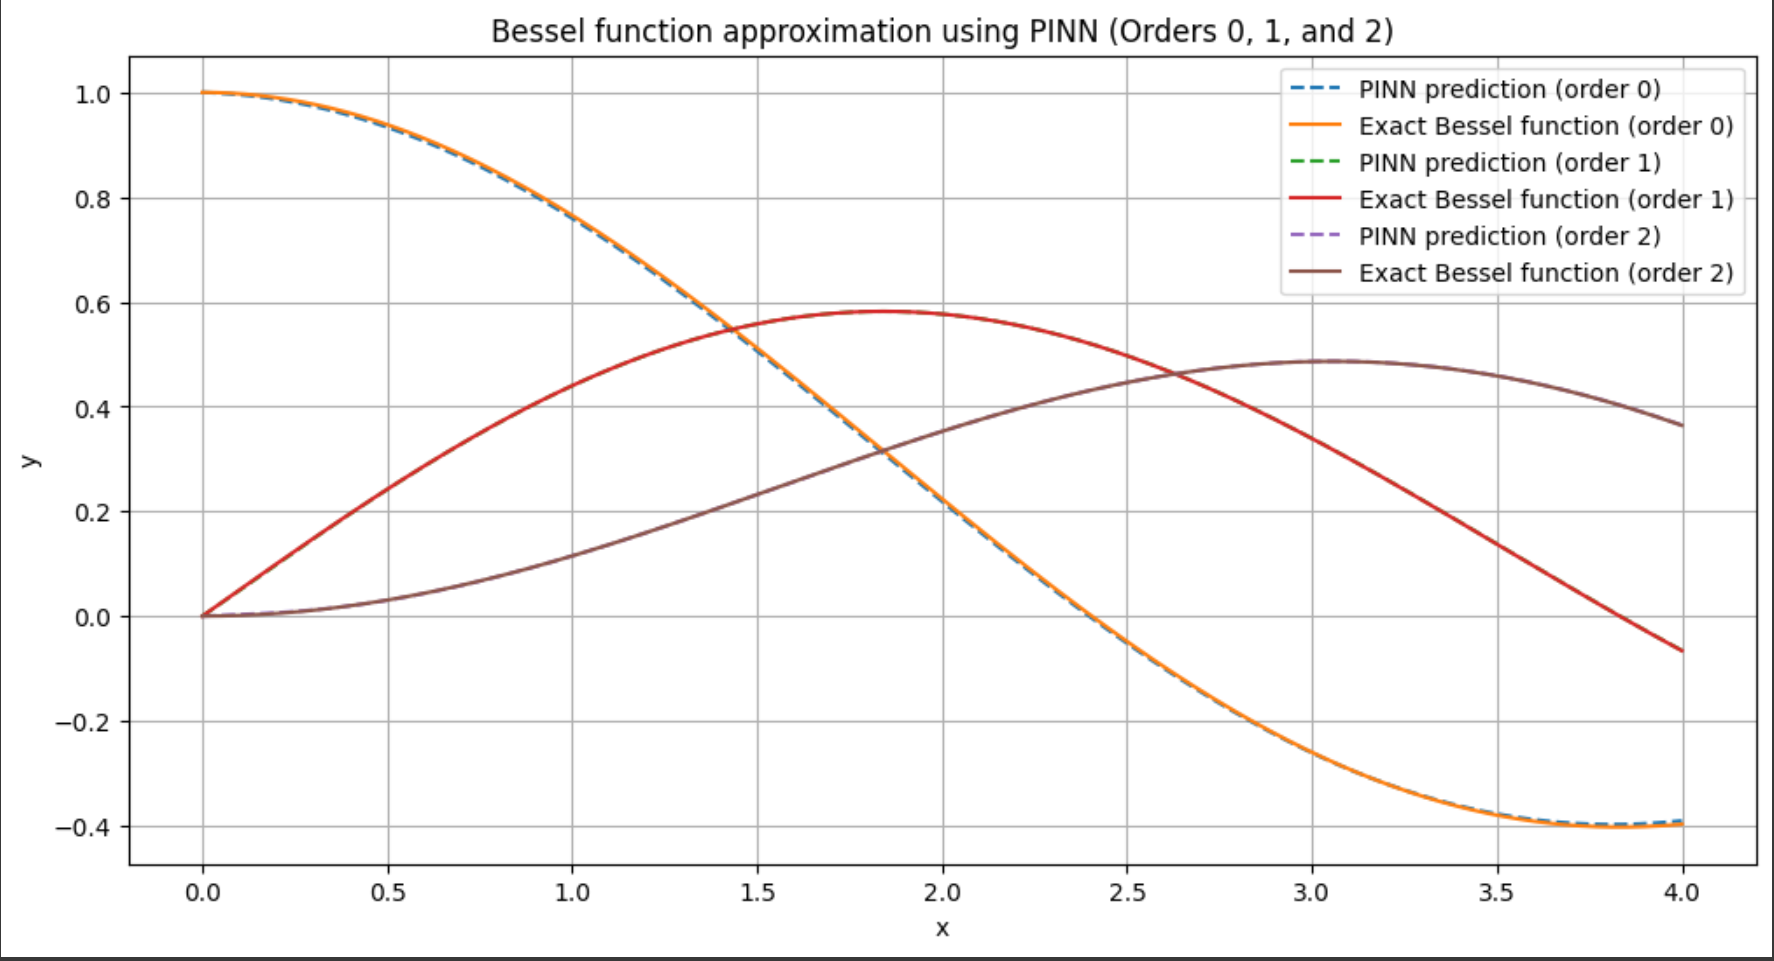

In [ ]:
`